<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$ 

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.


## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

- 
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1} 
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función 
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página 
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




In [30]:
#Definamos la funcion 
import numpy as np
import math


def exp_series(x, N):
    approx = 1.0
    term = 1.0
    for n in range(1, N+1): #El ciclo itera sumando cada temrino de la sumatoria para obtener la aproximacion en serie
        term *= -x/n
        approx += term
        if abs(term/approx) < 1e-7: 
            break
    return approx

exp_series(2,100) #Prueba del codigo

0.13533528356808788

In [31]:
#Vectoricemos para no usar un ciclo for.
def exp_series(x):
    n_values = np.arange(0, 100) #Creamos un arreglo de valores de n de 0 a 100 para iterar
    term_values = (-1)**n_values * x**n_values / np.math.factorial(n_values) #Calculamos los terminos de la sumatoria
    result = np.sum(term_values) #usando la funcion np.sum sumamos todos los valores en el arreglo term_values
    return result
exp_series(2) #Da un error debido a que la funcion np.math.factorial devuelve todo los valores del arreglo al tiempo

TypeError: ignored

Write a program that calculates  e−x

In [42]:
import numpy as np
import scipy.special #Buscando en internet encontre que esta funcion de scipy puede server

def exp_series(x):
    n_val = np.arange(0, 100)
    term_val = (-1)**n_val * x**n_val / scipy.special.factorial(n_val) #Devuelve el factorial uno a uno 
    result = np.sum(term_val)
    return result

result = exp_series(2)
print(result)


0.1353352832366127


Calculate your series for  x≤1  and compare it to the built-in function exp(x) (you may assume that the built-in exponential function is exact). You should pick an N for which the next term in the series is no more than  10−7  of the sum up to that point

In [41]:
def exp_series(x):
    n_val = np.arange(0, 100)
    term_val = (-1)**n_val * x**n_val / scipy.special.factorial(n_val) #Devuelve el factorial uno a uno 
    result = np.sum(term_val)
  

    sum_val = np.cumsum(term_val) #cumsum devuelve la suma acumulada de los valores de un array a lo largo de los ejes especificados
    next_term = abs(-x)**(n_val[-1]+1) / scipy.special.factorial(n_val[-1]+1) 
    if next_term <= 1e-7 * sum_val[-1]: #Definimos la condicion del error
        converge = True
    else:
        converge = False
    
    # Definimos la funcion expoenncial con numpy para hacer la comparacion
    exp_val = np.exp(-x)
    
   
    return sum_val[-1], exp_val, converge

# probamos la funcion para x <= 1
for x in np.arange(0, 1.1, 0.1):
    series_val, exp_val, converge = exp_series(x)
    print(f"x = {x:.1f}: series = {series_val:.8f}, exp = {exp_val:.8f}, converge = {converge}")

x = 0.0: series = 1.00000000, exp = 1.00000000, converge = True
x = 0.1: series = 0.90483742, exp = 0.90483742, converge = True
x = 0.2: series = 0.81873075, exp = 0.81873075, converge = True
x = 0.3: series = 0.74081822, exp = 0.74081822, converge = True
x = 0.4: series = 0.67032005, exp = 0.67032005, converge = True
x = 0.5: series = 0.60653066, exp = 0.60653066, converge = True
x = 0.6: series = 0.54881164, exp = 0.54881164, converge = True
x = 0.7: series = 0.49658530, exp = 0.49658530, converge = True
x = 0.8: series = 0.44932896, exp = 0.44932896, converge = True
x = 0.9: series = 0.40656966, exp = 0.40656966, converge = True
x = 1.0: series = 0.36787944, exp = 0.36787944, converge = True


Examine the terms in the series for  x≈10  and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation at  n≈x−1

In [57]:
import numpy as np
import scipy.special

def exp_series(x):
    n_val = np.arange(0, 100)
    term_val = (-1)**n_val * x**n_val / scipy.special.factorial(n_val) #Devuelve el factorial uno a uno 
    result = np.sum(term_val)
  

    sum_val = np.cumsum(term_val) #cumsum devuelve la suma acumulada de los valores de un array a lo largo de los ejes especificados
    next_term = abs(-x)**(n_val[-1]+1) / scipy.special.factorial(n_val[-1]+1) 
    if next_term <= 1e-7 * sum_val[-1]: #Definimos la condicion del error
        converge = True
    else:
        converge = False
    
    # Definimos la funcion expoenncial con numpy para hacer la comparacion
    exp_val = np.exp(-x)
    
    # probamos entonces para x~10
    if abs(x-10) < 1e-3:
        n = int(x) - 1
        print(f"Term {n}: {term_val[n]:.4e}")
        print(f"Term {n+1}: {term_val[n+1]:.4e}")
        print(f"Sum of terms {n} through {n+10}: {np.sum(term_val[n:n+10+1]):.4e}")
    
    # Return the result and convergence status
    return sum_val[-1], exp_val, converge


In [58]:
exp_series(10)

Term 9: -2.7557e+03
Term 10: 2.7557e+03
Sum of terms 9 through 19: -1.2186e+03


(127.05562505307005, 4.5399929762484854e-05, True)


 if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

Make a series of graphs of the error versus N for different values of x.

In [61]:
#redefinimos e^-x usando la otra forma
import numpy as np
import scipy.special

def exp_series(x):
    if x > 30:
        # Usa la relación exp(-x) = 1/exp(x) para valores grandes de x
        term_values = 1 / np.exp(x) * np.power(x, np.arange(0, 100)) / scipy.special.factorial(np.arange(0, 100))
    else:
        # Creamos matrices de términos, signos y factoriales
        n_values = np.arange(0, 100)
        term_values = (-1)**n_values * x**n_values / scipy.special.factorial(n_values)
    
    # Calcula la suma y verifique la convergencia
    sum_values = np.cumsum(term_values)
    next_term = abs(-x)**(n_values[-1]+1) / scipy.special.factorial(n_values[-1]+1) if x <= 30 else abs(1/x * term_values[-1])
    if next_term <= 1e-7 * sum_values[-1]:
        converged = True
    else:
        converged = False
    
    # Comparara con la función exp incorporada 
    exp_val = np.exp(-x) if x <= 30 else 1 / np.exp(x)
    
    # Devuelve el resultado y el estado de convergencia
    return sum_values[-1], exp_val, converged

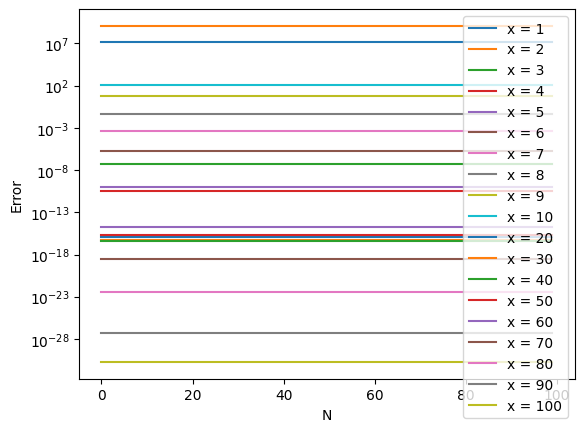

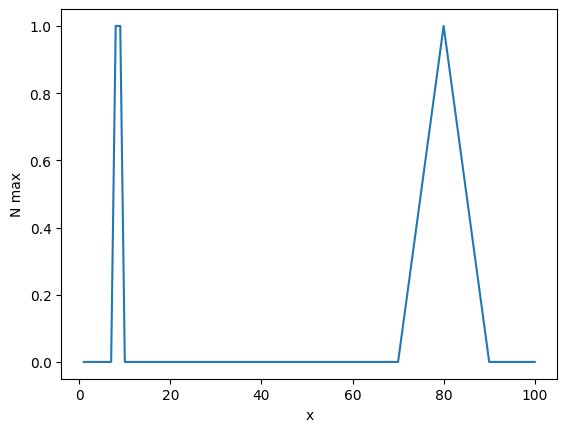

La serie no converge para los valores de x: [ 8  9 80]


In [65]:
#Ahora podemos usar esta función para determinar experimentalmente cuándo la serie comienza a perder precisión y cuándo ya no converge para diferentes valores de x:

import matplotlib.pyplot as plt

# Definimos un rango de valores x para probar
x_values = np.concatenate((np.arange(1, 11), np.arange(20, 101, 10)))

# matrices para almacenar resultados
n_max_values = np.zeros_like(x_values, dtype=int)
converged_values = np.zeros_like(x_values, dtype=bool)
error_values = np.zeros((len(x_values), 100))

# Calculamos el error para cada valor de x y cada valor de N
for i, x in enumerate(x_values):
    for n in range(100):
        # Calculamos el error y el estado de convergencia para el valor N actual
        sum_value, exp_value, converged = exp_series(x)
        error = abs(exp_value - sum_value)
        
        # Actualiczamos las matrices creadas antes para almacenar los resultados.
        error_values[i, n] = error
        converged_values[i] = converged
        if n_max_values[i] == 0 and not converged:
            n_max_values[i] = n

# Graficamos el error
for i, x in enumerate(x_values):
    plt.plot(range(100), error_values[i], label=f'x = {x}')

plt.yscale('log')
plt.xlabel('N')
plt.ylabel('Error')
plt.legend()
plt.show()

# graficamos el valor máximo de N antes de que la serie pierda precisión para cada valor de x
plt.plot(x_values, n_max_values)
plt.xlabel('x')
plt.ylabel('N max')
plt.show()

# Imprime los valores de x para los cuales la serie no converge
print('La serie no converge para los valores de x:', x_values[~converged_values])

# Cancelación sustractiva

In [66]:
#Definimos las 3 sumatorias
def S1(N):
    sum_odd = 0
    sum_even = 0
    for n in range(1, N+1):
        if n % 2 == 0:
            sum_even += (-1)**n * n / (n+1)
        else:
            sum_odd += (-1)**n * n / (n+1)
    return sum_odd + sum_even

def S2(N):
    sum_even = 0
    sum_odd = 0
    for n in range(1, N+1):
        if n % 2 == 0:
            sum_even -= n / (2*n - 1)
        else:
            sum_odd += n / (2*n + 1)
    return sum_even + sum_odd

def S3(N):
    sum_terms = 0
    for n in range(1, N+1):
        sum_terms += 1 / (2*n * (2*n+1))
    return sum_terms


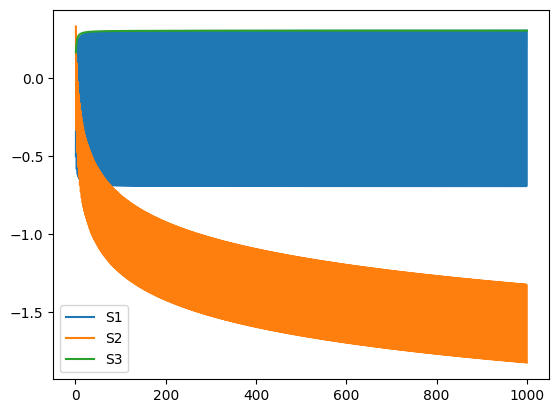

In [67]:
#Evaluamos la convergencia de cada sumatoria. para esto, se realizarán gráficos de la suma parcial de las series en función del número de términos.
import matplotlib.pyplot as plt

N = 1000
x = list(range(1, N+1))

# Grafico de S1
y1 = [S1(n) for n in x]
plt.plot(x, y1, label="S1")

# Grafico de S2
y2 = [S2(n) for n in x]
plt.plot(x, y2, label="S2")

# Grafico de S3
y3 = [S3(n) for n in x]
plt.plot(x, y3, label="S3")

plt.legend()
plt.show()


En el gráfico se observa que las tres series convergen a medida que aumenta el número de términos.